In [74]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.preprocessing import quantile_transform, RobustScaler, Normalizer

In [2]:
path_raw_data = "./../ressources/raw_data_comple.csv"
path_to_preprocessed_data = "./../ressources/data_preprocessed.csv"

In [3]:
df = pd.read_csv(path_raw_data, index_col=False)

__Remove duplicates tweets (not excluding Rt)__

In [4]:
df.drop_duplicates(subset=["texte"], inplace=True)
df.texte.value_counts()

NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONSIEUR ZEMMOUR POUR CETTE INTERVENTION. JE SUIS OBLIGÉ DE SALUER CE DIS… https://t.co/GcDeDSS9mH        1
RT @LeoLaStrophe: Pourquoi aucun  #média n'en parle ?\n\n#jeremycohen tabassé par des racailles avant de se faire écraser par un tramway.\n\n #…    1
Big Bang son 5, le duela a quien le duela 😋😋😋 #BIGBANG_StillLife                                                                                    1
RT @SapphireKyu_36: AAAAHHHHHHHHH\n\n#BIGBANG_StillLife since:2022-04-03_12:38:21_UTC https://t.co/bcOXHOWlhy                                       1
RT @Tokyopa2: COMMENT VOULEZ VOUS QUE JE M'EN REMETTE 😭😭\n\n #BIGBANG_StillLife https://t.co/7mDLtBgqg5                                             1
                                                                                                                                                   ..
Dieu merci Mbappe est français, par contre Pedri est espagnol et ça me tracasse                     

In [5]:
df.to_csv(path_raw_data, index=False)

__Info__

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1954 entries, 0 to 2356
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   user_id          1954 non-null   int64 
 1   texte            1954 non-null   object
 2   created_at       1954 non-null   object
 3   followers_count  1954 non-null   int64 
 4   is_verified      1954 non-null   int64 
 5   location         1147 non-null   object
 6   lang             1954 non-null   object
 7   fav              1954 non-null   int64 
 8   retweet          1954 non-null   int64 
 9   trend            1954 non-null   object
 10  trend_volume     1954 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 183.2+ KB


In [7]:
df.head()

,user_id,texte,created_at,followers_count,is_verified,location,lang,fav,retweet,trend,trend_volume
0,179530581,NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONS...,2022-04-02 02:37:39,5689800,1,NaN,fr,26457,7409,Booba,54842
1,33887820,"""Bravo Monsieur Zemmour"" : le rappeur Booba pr...",2022-04-02 15:16:07,166955,1,"Languedoc-Roussillon, France",fr,4249,1611,Booba,54842
2,27412519,Le rappeur Booba soutient publiquement Eric Ze...,2022-04-02 17:34:11,438536,1,Nouvelle-Aquitaine,fr,3560,1090,Booba,54842
3,1205851115948036096,RT @Lomav140: Booba c le seul rappeur grand pu...,2022-04-03 13:50:26,19676,0,Dans son cœur,fr,0,1985,Booba,54842
4,1438998366910832644,RT @Valeurs: 🔴 LGBT : Le rappeur Booba salue l...,2022-04-03 13:50:24,44,0,Bretagne Z.,fr,0,1305,Booba,54842


In [8]:
df.shape

(1954, 11)

In [9]:
df.texte.value_counts()

NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONSIEUR ZEMMOUR POUR CETTE INTERVENTION. JE SUIS OBLIGÉ DE SALUER CE DIS… https://t.co/GcDeDSS9mH        1
RT @LeoLaStrophe: Pourquoi aucun  #média n'en parle ?\n\n#jeremycohen tabassé par des racailles avant de se faire écraser par un tramway.\n\n #…    1
Big Bang son 5, le duela a quien le duela 😋😋😋 #BIGBANG_StillLife                                                                                    1
RT @SapphireKyu_36: AAAAHHHHHHHHH\n\n#BIGBANG_StillLife since:2022-04-03_12:38:21_UTC https://t.co/bcOXHOWlhy                                       1
RT @Tokyopa2: COMMENT VOULEZ VOUS QUE JE M'EN REMETTE 😭😭\n\n #BIGBANG_StillLife https://t.co/7mDLtBgqg5                                             1
                                                                                                                                                   ..
Dieu merci Mbappe est français, par contre Pedri est espagnol et ça me tracasse                     

__Missing values__

In [10]:
df.isna().sum()

user_id              0
texte                0
created_at           0
followers_count      0
is_verified          0
location           807
lang                 0
fav                  0
retweet              0
trend                0
trend_volume         0
dtype: int64

__Shape dataframe__

In [11]:
df.shape

(1954, 11)

__Preprocessing__

In [12]:
df_preprocessed = pd.read_csv(path_to_preprocessed_data)

In [13]:
df_preprocessed

,user_id,texte,created_at,followers_count,is_verified,location,lang,fav,retweet,trend,trend_volume,tweet_hour,tweet_day_of_the_week,tweet_quarter
0,179530581,NON À L’ENDOCTRINEMENT DES ENFANTS. BRAVO MONS...,2022-04-02 02:37:39,5689800,1,NaN,fr,26457,7409,Booba,54842,2,5,2
1,33887820,"""Bravo Monsieur Zemmour"" : le rappeur Booba pr...",2022-04-02 15:16:07,166955,1,"Languedoc-Roussillon, France",fr,4249,1611,Booba,54842,15,5,2
2,27412519,Le rappeur Booba soutient publiquement Eric Ze...,2022-04-02 17:34:11,438536,1,Nouvelle-Aquitaine,fr,3560,1090,Booba,54842,17,5,2
3,1205851115948036096,RT @Lomav140: Booba c le seul rappeur grand pu...,2022-04-03 13:50:26,19676,0,Dans son cœur,fr,0,1985,Booba,54842,13,6,2
4,1438998366910832644,RT @Valeurs: 🔴 LGBT : Le rappeur Booba salue l...,2022-04-03 13:50:24,44,0,Bretagne Z.,fr,0,1305,Booba,54842,13,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1949,1153096255,"RT @momo_brbi: @WeshDiego Eux en ce moment, qu...",2022-04-05 13:50:00,146,0,NaN,fr,0,2,#RedditPlace,104981,13,1,2
1950,1093593121659731973,dehors @Rubiu5 #RedditPlace https://t.co/EeH87...,2022-04-05 13:49:50,154,0,l’Ile de la baleine,fr,0,0,#RedditPlace,104981,13,1,2
1951,2178559490,RT @EstragonSan: Je pleure de rire #RedditPlac...,2022-04-05 13:49:32,1862,0,Mars,fr,0,38,#RedditPlace,104981,13,1,2
1952,940353641541701632,RT @sandruisseau: Merci à tout.te.s mes abonné...,2022-04-05 13:49:16,155,0,Bassin D'arcachon,fr,0,46,#RedditPlace,104981,13,1,2


__Correlations__

<AxesSubplot:>

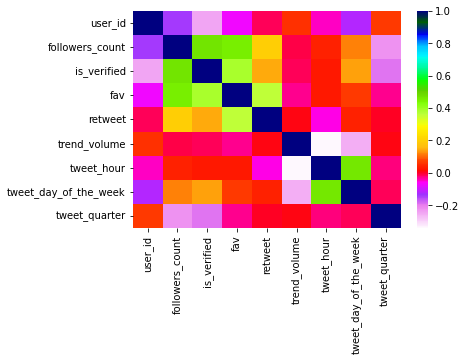

In [14]:
import seaborn as sns

corr_ = df_preprocessed.corr()
sns.heatmap(corr_,
           cmap="gist_ncar_r")

* __Target correlations__

   Correlations with follower_counts and is_verified feature
        

* __Features correlations__

__Target__

In [16]:
fav = df_preprocessed.fav.values
retweet = df_preprocessed.retweet.values

<AxesSubplot:>

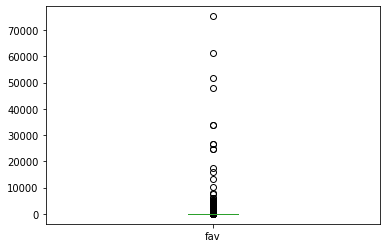

In [31]:
df_preprocessed.fav.plot(kind='box')

* There is outliers in the distribution

__Log Transformation__

In [55]:
df_preprocessed["log_fav"] = df_preprocessed.fav.apply(lambda x: np.log(x) if x > 0 else 0)

<AxesSubplot:ylabel='Frequency'>

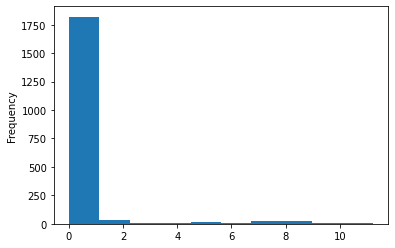

In [56]:
df_preprocessed.log_fav.plot(kind="hist")

<AxesSubplot:>

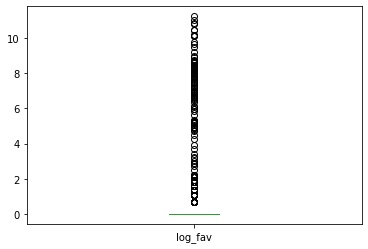

In [57]:
df_preprocessed.log_fav.plot(kind="box")

__quantile transformations__

In [68]:
fav_quantile_trans = quantile_transform(
    df_preprocessed.fav.to_frame(), n_quantiles=1000, output_distribution="normal", copy=True
).squeeze()

(array([1.696e+03, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        2.210e+02, 3.500e+01, 1.000e+00, 1.000e+00]),
 array([-5.19933758e+00, -4.15947007e+00, -3.11960255e+00, -2.07973503e+00,
        -1.03986752e+00,  4.89217555e-11,  1.03986752e+00,  2.07973503e+00,
         3.11960255e+00,  4.15947007e+00,  5.19933758e+00]),
 <BarContainer object of 10 artists>)

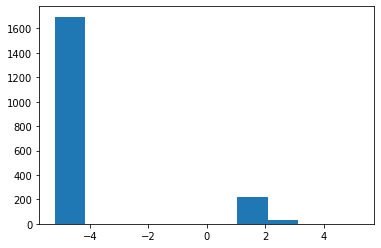

In [69]:
plt.hist(fav_quantile_trans)

__Normalizer__

In [83]:
scale_fav  = Normalizer(norm="l1").fit_transform(df_preprocessed.fav.to_frame())

(array([1696.,    0.,    0.,    0.,  258.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 <BarContainer object of 5 artists>)

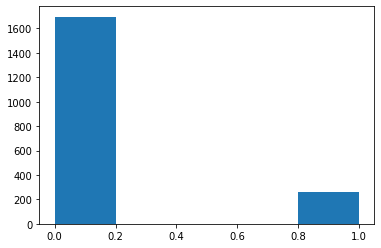

In [87]:
plt.hist(scale_fav, bins=5)

* Exactly what we want, 2 big buckets 
* The first's one group tweet with low fav and the second's one group with big values